In [0]:
#if you are going to be training over 3 days, you need to make sure MLFlow won't disconnect from where it is writing results
access_token = dbutils.secrets.get(scope="long-MLFlow", key="[key here]")
import os
os.environ["DATABRICKS_TOKEN"] = access_token
os.environ["DATABRICKS_HOST"] = "https://adb-[host].16.azuredatabricks.net"
from databricks_cli.configure import provider
config_provider = provider.EnvironmentVariableConfigProvider()
provider.set_config_provider(config_provider)

In [0]:
%fs
ls FileStore/models/

path,name,size
dbfs:/FileStore/models/D01262021-T214619/,D01262021-T214619/,0
dbfs:/FileStore/models/D01262021-T224822/,D01262021-T224822/,0
dbfs:/FileStore/models/D01262021-T225626/,D01262021-T225626/,0
dbfs:/FileStore/models/D01272021-T165059/,D01272021-T165059/,0
dbfs:/FileStore/models/D01272021-T192613/,D01272021-T192613/,0
dbfs:/FileStore/models/D01272021-T194920/,D01272021-T194920/,0
dbfs:/FileStore/models/D01272021-T202455/,D01272021-T202455/,0
dbfs:/FileStore/models/D01272021-T204251/,D01272021-T204251/,0
dbfs:/FileStore/models/D01282021-T202026/,D01282021-T202026/,0
dbfs:/FileStore/models/D01292021-T165359/,D01292021-T165359/,0


In [0]:
# 0. Need to have pyspark to import our data
from pyspark.sql.functions import col

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value.
seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value.
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value.
import numpy as np
import pandas as pd
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value.
# import tensorflow
from tensorflow import keras
import tensorflow as tf
tf.random.set_seed(seed_value)

# 5. Import MLFlow.
import mlflow

# 6. Prepare for our plotting style.
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.family'] = [u'serif']
plt.rcParams['font.size'] = 14

# 7. Need to document based on what time it is.
import time
from datetime import datetime

# 8. For training,
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import mlflow.keras
import seaborn as sns
from sklearn.model_selection import KFold

# 9. For saving loss history (see plotting functions in )
from pickle import dump

In [0]:
%run ./digital_twin_utils

In [0]:
#for now, we don't need to work with all data
df = spark.read.format("csv").option("header", "true").load("/FileStore/tables/data_release.csv")
# display(df)

our_data = df.toPandas()
our_data

Out[10]:

,time,file,B:ACMNIG,B:ACMNPG,B:ACMXIG,B:ACMXPG,B:DCIG,B:DCPG,B:GMPS4V,B:GMPSBT,B:GMPSFF,B:IMAXXG,B:IMAXXO,B:IMINER,B:IMINST,B:IMINXG,B:IMINXO,B:IPHSTC,B:LINFRQ,B:NGMPS,B:VIMAX,B:VIMIN,B:VINHBT,B:VIPHAS,B_ACMNIG,B_ACMNPG,B_ACMXIG,B_ACMXPG,B_DCIG,B_DCPG,B_GMPSBT,B_GMPSFF,B_IMAXXG,B_IMAXXO,B_IMINST,B_IMINXG,B_IMINXO,B_IPHSTC,B_VIMAX,B_VIMIN,B_VINHBT,B_VIPHAS,I:IB,I:MDAT40,I:MXIB
0,2020-03-10T05:00:00.081Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,136.13451113,3.0E-4,3.2042,-117.88400269,10.0,0.1346875,0.0,-11.82499981,0.0,20.0,26.11790771,4.0,966.08349609,103.37957001,1.0,1.81169987,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,7055.9375,7033.23361377,7033.41064453
1,2020-03-10T05:00:00.148Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,123.13449813,3.0E-4,3.2042,-117.88400269,10.0,-0.2703125,0.0,-11.82499981,0.0,20.0,26.06334229,4.0,966.07373047,103.4212265,1.0,1.81246901,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,7017.1875,6261.59665404,6250.28417969
2,2020-03-10T05:00:00.215Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,119.23449423,3.0E-4,3.2042,-117.88400269,10.0,-0.3053125,0.0,-11.82499981,0.0,20.0,26.00877686,4.0,966.03771973,103.42545319,1.0,1.81087375,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,6344.6875,5105.5907994,5093.85107422
3,2020-03-10T05:00:00.281Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,142.95951796,3.0E-4,3.2042,-117.88400269,10.0,-0.2603125,0.0,-11.82499981,0.0,20.0,26.08153076,4.0,966.05407715,103.42035675,1.0,1.81242967,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,5192.1875,3989.56297194,3978.28979492
4,2020-03-10T05:00:00.348Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,133.53450853,3.0E-4,3.2042,-117.88400269,10.0,-0.1853125,0.0,-11.82499981,0.0,20.0,26.2088501,4.0,966.03118896,103.41226959,1.0,1.81319046,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,4064.6875,2907.40965606,2896.43261719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295708,2020-03-11T04:59:59.703Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,105.25948026,3.0E-4,3.2042,-117.88400269,10.0,0.1746875,0.0,-11.82499981,0.0,20.0,-4.57514648,4.0,966.04425049,103.40161896,1.0,1.80724561,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.08502197,103.41963959,1.0,1.80999994,4063.4375,2907.40965606,2896.37744141
1295709,2020-03-11T04:59:59.770Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,103.95947896,3.0E-4,3.2042,-117.88400269,10.0,0.0946875,0.0,-11.82499981,0.0,20.0,-4.53876953,4.0,966.07373047,103.40975952,1.0,1.80725086,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.08502197,103.41963959,1.0,1.80999994,2977.1875,1855.77391818,1845.10192871
1295710,2020-03-11T04:59:59.837Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,92.25946726,3.0E-4,3.2042,-117.88400269,10.0,0.0146875,0.0,-11.82499981,0.0,20.0,-4.63425903,4.0,966.06713867,103.41788483,1.0,1.80711937,0.75350088,10.00000572,0.30000001,3.0,0.

In [0]:
nsteps=250000
df = our_data.head(nsteps)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(axis=0)

df = df.set_index(pd.to_datetime(df.time))
df = df.dropna()
df = df.drop_duplicates()
print(len(df))
print(df.keys())

df.head(5)

250000
Index(['time', 'file', 'B:ACMNIG', 'B:ACMNPG', 'B:ACMXIG', 'B:ACMXPG',
 'B:DCIG', 'B:DCPG', 'B:GMPS4V', 'B:GMPSBT', 'B:GMPSFF', 'B:IMAXXG',
 'B:IMAXXO', 'B:IMINER', 'B:IMINST', 'B:IMINXG', 'B:IMINXO', 'B:IPHSTC',
 'B:LINFRQ', 'B:NGMPS', 'B:VIMAX', 'B:VIMIN', 'B:VINHBT', 'B:VIPHAS',
 'B_ACMNIG', 'B_ACMNPG', 'B_ACMXIG', 'B_ACMXPG', 'B_DCIG', 'B_DCPG',
 'B_GMPSBT', 'B_GMPSFF', 'B_IMAXXG', 'B_IMAXXO', 'B_IMINST', 'B_IMINXG',
 'B_IMINXO', 'B_IPHSTC', 'B_VIMAX', 'B_VIMIN', 'B_VINHBT', 'B_VIPHAS',
 'I:IB', 'I:MDAT40', 'I:MXIB'],
 dtype='object')
Out[11]:

,time,file,B:ACMNIG,B:ACMNPG,B:ACMXIG,B:ACMXPG,B:DCIG,B:DCPG,B:GMPS4V,B:GMPSBT,B:GMPSFF,B:IMAXXG,B:IMAXXO,B:IMINER,B:IMINST,B:IMINXG,B:IMINXO,B:IPHSTC,B:LINFRQ,B:NGMPS,B:VIMAX,B:VIMIN,B:VINHBT,B:VIPHAS,B_ACMNIG,B_ACMNPG,B_ACMXIG,B_ACMXPG,B_DCIG,B_DCPG,B_GMPSBT,B_GMPSFF,B_IMAXXG,B_IMAXXO,B_IMINST,B_IMINXG,B_IMINXO,B_IPHSTC,B_VIMAX,B_VIMIN,B_VINHBT,B_VIPHAS,I:IB,I:MDAT40,I:MXIB
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-10 05:00:00.081000+00:00,2020-03-10T05:00:00.081Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,136.13451113,3.0E-4,3.2042,-117.88400269,10.0,0.1346875,0.0,-11.82499981,0.0,20.0,26.11790771,4.0,966.08349609,103.37957001,1.0,1.81169987,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,7055.9375,7033.23361377,7033.41064453
2020-03-10 05:00:00.148000+00:00,2020-03-10T05:00:00.148Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,123.13449813,3.0E-4,3.2042,-117.88400269,10.0,-0.2703125,0.0,-11.82499981,0.0,20.0,26.06334229,4.0,966.07373047,103.4212265,1.0,1.81246901,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,7017.1875,6261.59665404,6250.28417969
2020-03-10 05:00:00.215000+00:00,2020-03-10T05:00:00.215Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,119.23449423,3.0E-4,3.2042,-117.88400269,10.0,-0.3053125,0.0,-11.82499981,0.0,20.0,26.00877686,4.0,966.03771973,103.42545319,1.0,1.81087375,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,6344.6875,5105.5907994,5093.85107422
2020-03-10 05:00:00.281000+00:00,2020-03-10T05:00:00.281Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,142.95951796,3.0E-4,3.2042,-117.88400269,10.0,-0.2603125,0.0,-11.82499981,0.0,20.0,26.08153076,4.0,966.05407715,103.42035675,1.0,1.81242967,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,5192.1875,3989.56297194,3978.28979492
2020-03-10 05:00:00.348000+00:00,2020-03-10T05:00:00.348Z,MLParamData_1583906408.4261804_From_MLrn_2020-...,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,133.53450853,3.0E-4,3.2042,-117.88400269,10.0,-0.1853125,0.0,-11.82499981,0.0,20.0,26.2088501,4.0,966.03118896,103.41226959,1.0,1.81319046,0.75350088,10.00000572,0.30000001,3.0,0.0,0.0,3.0E-4,3.2042,-117.88400269,10.0,0.0,-11.82499981,0.0,20.0,966.1050415,103.39315796,1.0,1.80999994,4064.6875,2907.40965606,2896.43261719


In [0]:
our_data2, scale_dict = scale(df, var_list = ['B:VIMIN', 'B:IMINER', 'B_VIMIN', 'B:LINFRQ', 'B:ACMNIG', 'B:ACMNPG', 'I:IB', 'I:MDAT40'])

Variable B:VIMIN with upper 103.45585632324219 and lower 103.33849334716797
Variable B:IMINER with upper 0.5196874737739563 and lower -0.520312488079071
Variable B_VIMIN with upper 103.40166473388672 and lower 103.39315795898438
Variable B:LINFRQ with upper 37.33110427856445 and lower -31.444072723388672
Variable B:ACMNIG with upper 0.75350088 and lower 0
Variable B:ACMNPG with upper 9.7023 and lower 8.6913
Variable I:IB with upper 7060.9375 and lower 345.9375
Variable I:MDAT40 with upper 7033.38623046875 and lower 369.415283203125

In [0]:
new_scaling = our_data2[['B:VIMIN', 'B:IMINER', 'B_VIMIN', 'B:LINFRQ', 'B:ACMNIG', 'B:ACMNPG', 'I:IB', 'I:MDAT40']]
new_scaling['B:VIMIN'] = new_scaling['B:VIMIN'].shift(-1)
new_scaling

Out[38]:

,B:VIMIN,B:IMINER,B_VIMIN,B:LINFRQ,B:ACMNIG,B:ACMNPG,I:IB,I:MDAT40
time,,,,,,,,
2020-03-10 05:00:00.081000+00:00,0.200221,0.129808,-0.705830,0.271669,0.0,0.794466,0.607595,0.619124
2020-03-10 05:00:00.148000+00:00,0.236235,-0.259615,-0.705830,0.270876,0.0,0.794466,0.601824,0.503332
2020-03-10 05:00:00.215000+00:00,0.192810,-0.293269,-0.705830,0.270083,0.0,0.794466,0.501675,0.329861
2020-03-10 05:00:00.281000+00:00,0.123903,-0.250000,-0.705830,0.271140,0.0,0.794466,0.330045,0.162389
2020-03-10 05:00:00.348000+00:00,0.047520,-0.177885,-0.705830,0.272992,0.0,0.794466,0.162137,0.000000
...,...,...,...,...,...,...,...,...
2020-03-10 09:37:47.224000+00:00,0.234220,0.043269,0.588341,0.107504,0.0,0.794466,-0.188757,-0.033591
2020-03-10 09:37:47.291000+00:00,0.277254,-0.062500,0.588341,0.107107,0.0,0.794466,-0.050447,0.107046
2020-03-10 09:37:47.358000+00:00,0.242605,-0.197115,0.588341,0.105983,0.0,0.794466,0.227476,0.245575


In [0]:
## 1 second (cycle - 15Hz)
look_back    = 1*15 #1 second lookback. paper had 10 --> 150 timesteps
look_forward = 1 #4/19: we might eventually want to train to see if it can look forward more (see reviewer 2's comments)

#first two spots are what is the surrogate model is predicting out. so this will be an 8 --> 2
variables = ['B:VIMIN', 'B:IMINER', 'B_VIMIN', 'B:LINFRQ', 'I:IB', 'I:MDAT40']
             #'B:ACMNIG', 'B:ACMNPG', 'I:IB', 'I:MDAT40']
data_list = []
x_train_list = []
x_test_list = []

for v in range(len(variables)):
    data_list.append(get_dataset(new_scaling, variable=variables[v])) #df #decomp_df #new_scaling
    x_train_list.append(data_list[v][0]) #1
    x_test_list.append(data_list[v][2]) #3
    
# Axis
concate_axis=1

## Booster model data, only predicting B:VIMIN and B:IMINER
BoX_train = np.concatenate(x_train_list,axis=concate_axis) 
BoY_train = np.concatenate((data_list[0][1],data_list[1][1]), axis=1) #,data_list[2][2],data_list[3][2],data_list[4][2],data_list[5][2]) 
BoX_test = np.concatenate(x_test_list,axis=concate_axis) 
BoY_test = np.concatenate((data_list[0][3],data_list[1][3]), axis=1) #data_list[2][4],data_list[3][4],data_list[4][4],data_list[5][4]),axis=1) 

print(BoX_train.shape)
print(BoY_train.shape)

(174983, 6, 15)
(174983, 2)

In [0]:
#start_time=time.time()
now = datetime.now()
timestamp = now.strftime("D%m%d%Y-T%H%M%S")
print("date and time:", timestamp)

#no longer need to save the scaler, but need to create directory
dbutils.fs.mkdirs('dbfs:/FileStore/models/'+timestamp+'/')

date and time: D04192021-T170417
Out[44]: True

In [0]:
%run ./models

In [0]:
%run ./analysis

In [0]:
#if there's an error, go back and rerun import statement... still sorting out the clash
from tensorflow.keras.optimizers import Adam

2.1.0

In [0]:
#def train_surrogate(data, x_train, y_train, x_val, y_val):
e= 3 #250 #250 #250 #1
bs=32 #was 99
in_shape=(len(variables), 15) #150)
out_shape= 2 #4
if concate_axis==2:
    in_shape=(1,len(variables)*15) #150)

## Callbacks
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
# reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.85, patience=5, min_lr=1e-6,verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss',min_delta=0, patience=10, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
#loss_history = History()

## Model 
booster_model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)
opt = Adam(lr=1e-2,clipnorm=1.0, clipvalue=0.5)
#booster_model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mape','mae'])
booster_model.compile(loss='mse', optimizer=opt, metrics=['mse','mape','mae'])
booster_model.summary()

#now = datetime.now()
timestamp = now.strftime("D%m%d%Y-T%H%M%S")
print("date and time:", timestamp)
save_name='fullbooster_noshift_e{}_bs{}_k_invar{}_outvar{}_axis{}_mmscaler_t0_{}'.format(e,bs,len(variables),out_shape,concate_axis,timestamp)

#START MLFLOW EXPERIMENT
with mlflow.start_run() as run:
  start_time=time.time()
  print("Inside MLflow Run with id %s" % run.info.run_uuid)
  mlflow.autolog() #need to figure out library compatibility
  
  ## Prep data
  k = 0
  histories = []
  kf = KFold(n_splits=5, random_state=None, shuffle=False) #5
  
  mlflow.log_params({"look back": look_back, "input_variables": len(variables), "k-folds": kf.get_n_splits()})

  for train_index, val_index in kf.split(BoX_train):
    x_train, x_val = BoX_train[train_index], BoX_train[val_index]
    y_train, y_val = BoY_train[train_index], BoY_train[val_index]
   
    if k == 0:
      mlflow.log_params({"TrainX shape": x_train.shape, "TrainY shape": y_train.shape, "ValX shape": x_val.shape, "ValY shape": y_val.shape})

    #mlflow.keras.autolog()
    ## Save best model callback
    mcp_name=save_name+'_kfold{}_'.format(k)

    #unclear if this will suddenly save now
    mcp_save = tf.keras.callbacks.ModelCheckpoint(filepath= "/tmp/best_model.h5", monitor = "val_loss", mode = 'min', save_best_only = True) #TODO: make sure this works #"/best_model"
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.85, patience=5, min_lr=1e-6,verbose=1)
    #early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=10, verbose=1, mode='auto', baseline=None, restore_best_weights=False) #no early stopping
#     _early_stop_check(mcp_save)
#     _early_stop_check(reduce_lr)
#     _early_stop_check(early_stopping)

    ## Run model
    history = booster_model.fit(x_train, y_train, epochs=e, batch_size=bs, validation_data=(x_val,y_val), #verbose=2, shuffle=True)
                                callbacks=[reduce_lr,mcp_save], verbose=2, shuffle=True) #no early stopping: early_stopping,
    histories.append(history)
    #print(histories[k].history['loss'])
    
    loss_plot(k, histories, booster_model, BoX_test, BoY_test)
    predict_plot(k, booster_model, BoX_test, BoY_test)
    data_distribution_plot(k, booster_model, BoX_test, BoY_test)
    statespace_distribution_plot(k, booster_model, BoX_test, BoY_test)
    data_heatmap(k, booster_model, BoX_test, BoY_test)

    #mlflow.log_metric("loss history", history) #maybe this broke? before i was saving it...
    #mlflow.keras.log_model(booster_model, 'dbfs:/FileStore/models/'+timestamp+'/'+mcp_name+'.h5')
    mlflow.keras.log_model(booster_model, artifact_path="model_{}".format(k))
    
    print('Current training time: {}'.format(time.time()-start_time))
    mlflow.log_metric("training time", float(time.time()-start_time))

    k+=1

print('Total training time: {}'.format(time.time()-start_time))
booster_model.save('/tmp/'+mcp_name+'_final.h5')
final_temp_path = 'file:/tmp/'+mcp_name+'_final.h5'
final_dbfs_model_path = 'dbfs:/FileStore/models/'+timestamp+'/'+mcp_name+'_final.h5'
dbutils.fs.cp(final_temp_path, final_dbfs_model_path)

ckpt_temp_path = 'file:/tmp/best_model.h5'
ckpt_dbfs_path = 'dbfs:/FileStore/models/'+timestamp+'/best_model.h5'
dbutils.fs.cp(ckpt_temp_path, ckpt_dbfs_path)

Model: "model_1"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
input_2 (InputLayer) [(None, 8, 15)] 0 
_________________________________________________________________
lstm_3 (LSTM) (None, 8, 256) 278528 
_________________________________________________________________
dropout_1 (Dropout) (None, 8, 256) 0 
_________________________________________________________________
lstm_4 (LSTM) (None, 8, 256) 525312 
_________________________________________________________________
lstm_5 (LSTM) (None, 256) 525312 
_________________________________________________________________
dense_1 (Dense) (None, 2) 514 
=================================================================
Total params: 1,329,666
Trainable params: 1,329,666
Non-trainable params: 0
_________________________________________________________________
date and time: D04192021-T170417
Inside MLflow Run with id 66825f4113564916aa4fb4069ad2357f
2021/04/19 17:05:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2021/04/19 17:05:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2021/04/19 17:05:35 WARNING mlflow.tracking.fluent: Exception raised while enabling autologging for spark: Exception while attempting to initialize JVM-side state for Spark datasource autologging. Please create a new Spark session and ensure you have the mlflow-spark JAR attached to your Spark session as described in http://mlflow.org/docs/latest/tracking.html#automatic-logging-from-spark-experimental. Exception:
'JavaPackage' object is not callable
Train on 725585 samples, validate on 181397 samples
Epoch 1/3
725585/725585 - 996s - loss: 0.3094 - mse: 0.0119 - mape: 244831.2656 - mae: 0.0566 - val_loss: 0.2990 - val_mse: 0.0107 - val_mape: 290294.0312 - val_mae: 0.0597
Epoch 2/3
725585/725585 - 991s - loss: 0.3018 - mse: 0.0111 - mape: 240760.2969 - mae: 0.0544 - val_loss: 0.3007 - val_mse: 0.0113 - val_mape: 287879.5938 - val_mae: 0.0609
Epoch 3/3
725585/725585 - 991s - loss: 0.3052 - mse: 0.0112 - mape: 236947.6406 - mae: 0.0546 - val_loss: 0.3015 - val_mse: 0.0133 - val_mape: 271843.7812 - val_mae: 0.0645
Current training time: 3450.923379421234
Train on 725585 samples, validate on 181397 samples
Epoch 1/3

In [0]:
%fs

ls /FileStore/models/D03012021-T173721/

path,name,size
dbfs:/FileStore/models/D03012021-T173721/best_model.h5,best_model.h5,16008832
dbfs:/FileStore/models/D03012021-T173721/full_loss.pkl,full_loss.pkl,1158
dbfs:/FileStore/models/D03012021-T173721/full_vloss.pkl,full_vloss.pkl,1158
dbfs:/FileStore/models/D03012021-T173721/fullbooster_noshift_e25_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D03012021-T173721_kfold4__final.h5,fullbooster_noshift_e25_bs32_k_invar6_outvar2_axis1_mmscaler_t0_D03012021-T173721_kfold4__final.h5,16008832


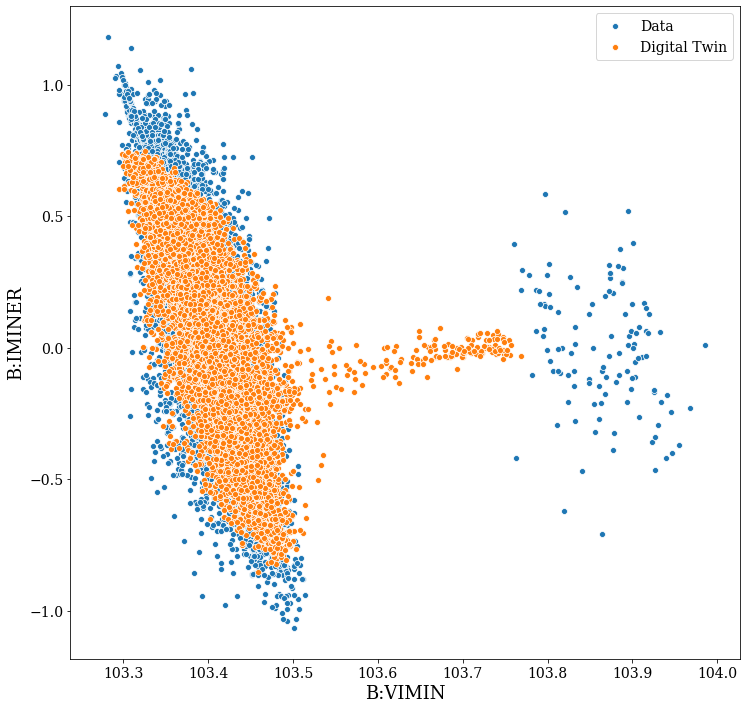

In [0]:
in_shape=(len(variables), 15) #150)
out_shape= 2 #4
if concate_axis==2:
    in_shape=(1,len(variables)*15) #150)
    
booster_model = build_lstm_model(input_shape=in_shape,output_shape=out_shape)
booster_model.load_weights('/dbfs/FileStore/models/D03012021-T173721/best_model.h5')

#from 4/14

k = 4
data_distribution_plot(k, booster_model, BoX_test, BoY_test, scale_dict)

#okay what happened to the scale_dict

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.rcParams['font.family'] = [u'serif']
plt.rcParams['font.size'] = 20

In [0]:
def predict_plot(fold, model, BoX_test, BoY_test):
  import seaborn as sns
  #model=booster_model
  x_test=BoX_test
  y_test=BoY_test
  nvar=2
  name='test_diff'
  start=0
  end=1000
  x = np.linspace(start,end,int(end-start))
  Y_predict = model.predict(x_test[start:end,:,:])
  #print(Y_predict.shape)
  fig, axs = plt.subplots(nvar,figsize=(16,16))
  
  vnames = variables[0:nvar] #should be names
  
  for v in range(nvar):
      Y_test_var1 = unscale(str(vnames[v]), y_test[start:end,v].reshape(-1,1), scale_dict)
      Y_predict_var1 = unscale(str(vnames[v]), Y_predict[:,v].reshape(-1,1), scale_dict)
    
#       no more scaler
#       Y_test_var1 = data_list[v][0].inverse_transform(y_test[start:end,v].reshape(-1,1))
#       Y_predict_var1 = data_list[v][0].inverse_transform(Y_predict[:,v].reshape(-1,1))
      
      #axs[v].plot(Y_test_var1,Y_predict_var1,'o')
      mape = 100*abs(Y_test_var1-Y_predict_var1)/Y_test_var1
      #print(x.shape)
      #print(mape.shape)
      mape = mape.reshape(-1,)
      #print(mape.shape)
      #print('mape ave:{}'.format(mape.mean()))
      axs[v].plot(Y_test_var1,label='Data')
      axs[v].plot(Y_predict_var1, label='Digital Twin')
      #axs[v].fill_between(x, mape, -mape, color='red',edgecolor="black",alpha=0.5) 
      #axs[v].plot(mape)
      #axs[v].set_title(variables[v])
      axs[v].set_ylabel(variables[v])
      axs[v].set_xlabel('Time samples')
      axs[v].legend()

  #plt.savefig('/dbfs/FileStore/models/'+timestamp+'/'+mcp_name+'_prediction_final.png')
  plt.savefig("prediction_{}.png".format(fold))
  mlflow.log_artifact("prediction_{}.png".format(fold))

  # plt.savefig('{}.png'.format(name))

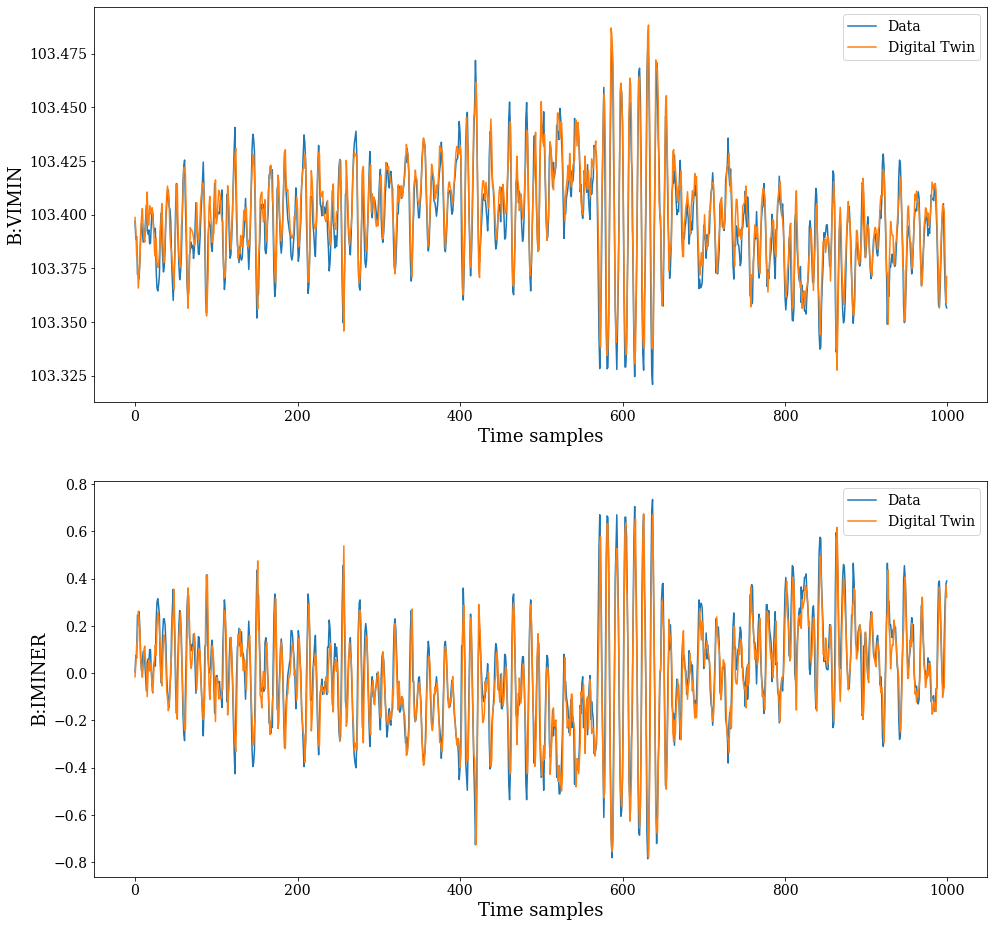

In [0]:
predict_plot(k, booster_model, BoX_test, BoY_test)

In [0]:
scale_dict

Out[72]: {'B:VIMIN': {'median': 0.0, 'range': 1.0},
 'B:IMINER': {'median': -0.0003125, 'range': 1.115},
 'B_VIMIN': {'median': 103.40417, 'range': 0.13541412},
 'B:LINFRQ': {'median': -10.459119, 'range': 101.80545},
 'B:ACMNIG': {'median': 0.7535009, 'range': 0.75350088},
 'B:ACMNPG': {'median': 9.1968, 'range': 1.0109999999999992},
 'I:IB': {'median': 2975.9375, 'range': 6728.75},
 'I:MDAT40': {'median': 2907.4097, 'range': 6663.9707}}

In [0]:
mlflow.end_run()

In [0]:
mlflow.tracking.get_tracking_uri()
# download_artifacts(run_id, path, dst_path=None)[source]

Out[21]: 'databricks'